### Beautiful Soup
Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:
- Realizará una solicitud HTTP GET a la 
- Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.
- Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página
- Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:
        "coche": Nombres de los coches.
        "precio_rebajado": Precios rebajados
        "precio_original": Precios originales
        "km": Kilómetros recorridos
- Retornará el DataFrame resultante
- Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame



In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
#1. Realizamos la solicitud HTTP y 2. comprobamos el estado de respuesta
url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
coches = requests.get(url_coches)
print("La respuesta de la petición es:", coches.status_code)

La respuesta de la petición es: 200


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
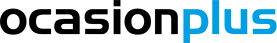

In [3]:
coches_soup = BeautifulSoup(coches.content, 'html.parser')
coches_soup
print (coches_soup.prettify())

In [4]:
#3.a Buscamos el NOMBRE DEL COCHE
lista_nombre_coche = coches_soup.find_all ("h2", {"style": "overflow-x:hidden"})
print(lista_nombre_coche[:4])
print ("______")

# y lo extraemos 
print(lista_nombre_coche[0].text)
print ("______")

#y para iterar en todos los nombre del coche (en una página)
nombre_coches = []

for nombre in lista_nombre_coche:
    nombre_coches.append (nombre.text)
print (nombre_coches [:4])

#y así sería lo anterior en una comprehensive list
#nombre_coches2 = [nombre.text for nombre in lista_nombre_coche]

[<h2 style="overflow-x:hidden">BMW X6 xDrive30d (258 CV)</h2>, <h2 style="overflow-x:hidden">SEAT Leon ST ST 1.5 TSI S&amp;S FR Go L  (150 CV)</h2>, <h2 style="overflow-x:hidden">Peugeot 308 Allure Pack BlueHDi 130 S&amp;S (130 CV)</h2>, <h2 style="overflow-x:hidden">Hyundai i40 1.7 CRDI BlueDrive Tecno (141 CV)</h2>]
______
BMW X6 xDrive30d (258 CV)
______
['BMW X6 xDrive30d (258 CV)', 'SEAT Leon ST ST 1.5 TSI S&S FR Go L  (150 CV)', 'Peugeot 308 Allure Pack BlueHDi 130 S&S (130 CV)', 'Hyundai i40 1.7 CRDI BlueDrive Tecno (141 CV)']


In [5]:
#3.b Buscamos el PRECIO ORIGINAL
precio_original = coches_soup.find_all ("span", {"class": "jsx-2870186023 priceLast"})
print (precio_original[:4])
print ("___________")

#iteramos para todos los de la misma página y tb extraemos directamente en la iteración (a través de "text")
lista_precio_original = []

for precio in precio_original:
    precio = precio.text
    precio_limpio = int(precio.split()[0].replace(".", "").replace("€", ""))
    lista_precio_original.append(precio_limpio)
    
print (lista_precio_original [:4])

[<span class="jsx-2870186023 priceLast">54.500<!-- -->€</span>, <span class="jsx-2870186023 priceLast">23.200<!-- -->€</span>, <span class="jsx-2870186023 priceLast">16.450<!-- -->€</span>, <span class="jsx-2870186023 priceLast">15.300<!-- -->€</span>]
___________
[54500, 23200, 16450, 15300]


In [6]:
#3.c Buscamos el PRECIO REBAJADO
precio_descuento = coches_soup.findAll ("span", {"class": "jsx-2689423372 price"})
print (precio_descuento[:4])
print ("___________")

#iteramos para todos los de la misma página y tb extraemos directamente en la iteración (a través de "text")
lista_precio_descuento = []

for precio in precio_descuento:
    precio = precio.text
    precio_limpio = int(precio.split()[0].replace(".", "").replace("€", ""))
    lista_precio_descuento.append(precio_limpio)
    
print (lista_precio_descuento [:4])

[<span class="jsx-2689423372 price">49.545<!-- -->€</span>, <span class="jsx-2689423372 price">21.091<!-- -->€</span>, <span class="jsx-2689423372 price">14.954<!-- -->€</span>, <span class="jsx-2689423372 price">13.909<!-- -->€</span>]
___________
[49545, 21091, 14954, 13909]


In [7]:
#3.d Buscamos los KM
import re

kms = coches_soup.find_all ("span", {"class": "jsx-3960002075 detail big"})
#print (kms[0:10])  #Exte bloque extrae más información que el kilometraje

kms_lista = []

for km in kms:
    km = km.text  #Extraemos la de cada una de las informaciones que hemos extraído en ese bloque de código
    km_busqueda = re.findall("\d{1,3}\.\d{3}",km) #y buscamos por los valores de km a través de regex
    km_limpio = km.replace (" km",""). replace (".",",") #y limpiamos los datos
    
    if len(km_busqueda) > 0:
        kms_lista.append (km_limpio)

print (kms_lista[0:11])


['60,614', '40,000', '64,851', '100,715', '65,144', '129,613', '63,861', '109,037', '20,349', '41,433', '62,617']


## VERSIÓN 1 - FILA POR PÁGINA

In [70]:
#Vamos a iterar por las 4 primeras páginas de la página web y almacenar todos los datos de coches en un diccionario

import re

diccionario_coches = {"coche":[], "precio_original":[], "precio_rebajado":[], "km":[]}

for page in range (1,5): #iteramos por las 4 primeras páginas del sitio web
    url_coches = f"https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D{page}"
    coches = requests.get(url_coches)
    print("La respuesta de la petición es:", coches.status_code)
    coches_soup = BeautifulSoup(coches.content, 'html.parser')
    

    lista_nombre_coche = coches_soup.find_all ("h2", {"style": "overflow-x:hidden"})
    nombre_coches = [nombre.text for nombre in lista_nombre_coche]
    diccionario_coches["coche"].append(nombre_coches)

    precio_original = coches_soup.find_all ("span", {"class": "jsx-2870186023 priceLast"})
    lista_precio_original = []
    for precio in precio_original:
        precio = precio.text
        precio_limpio = int(precio.split()[0].replace(".", "").replace("€", ""))
        lista_precio_original.append(precio_limpio)
    diccionario_coches["precio_original"].append(lista_precio_original)

    precio_descuento = coches_soup.findAll ("span", {"class": "jsx-2689423372 price"})
    lista_precio_descuento = []
    for precio in precio_descuento:
        precio = precio.text
        precio_limpio = int(precio.split()[0].replace(".", "").replace("€", ""))
        lista_precio_descuento.append(precio_limpio)
    diccionario_coches["precio_rebajado"].append(lista_precio_descuento)

    kms = coches_soup.find_all ("span", {"class": "jsx-3960002075 detail big"})
    kms_lista = []
    for km in kms:
        km = km.text  #Extraemos la de cada una de las informaciones que hemos extraído en ese bloque de código
        km_busqueda = re.findall("\d{1,3}\.\d{3}",km) #y buscamos por los valores de km a través de regex
        km_limpio = km.replace (" km",""). replace (".",",") #y limpiamos los datos
        if len(km_busqueda) > 0:
            kms_lista.append (km_limpio)
    diccionario_coches["km"].append(kms_lista)      
    

La respuesta de la petición es: 200
La respuesta de la petición es: 200
La respuesta de la petición es: 200
La respuesta de la petición es: 200


In [71]:
df = pd.DataFrame(diccionario_coches)
df.head(10)

,coche,precio_original,precio_rebajado,km
0,[Mercedes-Benz Clase C C 300 (258 CV) Pack AMG...,"[35700, 20690, 20500, 18400, 15090, 16300, 293...","[32454, 18809, 18636, 13200, 16727, 13718, 148...","[101,839, 36,999, 106,112, 108,211, 124,999, 1..."
1,"[BMW X6 xDrive30d (258 CV), SEAT Leon ST ST 1....","[54500, 23200, 16450, 15300, 13490, 23500, 189...","[49545, 21091, 14954, 13909, 12264, 10950, 213...","[60,614, 40,000, 64,851, 100,715, 65,144, 129,..."
2,[Peugeot 308 SW SW BlueHDI 130 GT EAT8 Auto (1...,"[21900, 23800, 12590, 23800, 11500, 22900, 232...","[19909, 17990, 17900, 12900, 21636, 13990, 109...","[38,220, 28,269, 80,045, 93,027, 39,412, 99,02..."
3,[Mercedes-Benz Clase C C 220 CDI Classic (150 ...,"[30490, 10500, 28500, 53900, 19200, 18900, 139...","[7700, 27718, 9545, 25909, 49000, 17454, 9800,...","[132,006, 34,553, 59,714, 17,449, 47,470, 138,..."


### VERSIÓN 2 - FILA POR COCHE
#### PARA PRECIO ORIGINAL, NO SÉ CÓMO AÑADIR ALGÚN ELEMENTO A ESOS "HUECOS" PARA QUE DEJE HACER LA TABLA -- en precio original y en kms

In [10]:
def scrape_coches (url):
    #1. Llamar a al sitio web y el código
    url = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
    coches = requests.get(url)
    print("La respuesta de la petición es:", coches.status_code)

    #2. Definir el Beautiful Soup
    coches_beautiful = BeautifulSoup(coches.content, 'html.parser')
    

In [110]:
import re

diccionario_coches2 = {"coche":[], "precio_original":[], "precio_rebajado":[], "km":[]}

for page in range (1,5): #iteramos por las 4 primeras páginas del sitio web
    url_coches = f"https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D{page}"
    coches = requests.get(url_coches)
    print("La respuesta de la petición es:", coches.status_code)
    coches_soup = BeautifulSoup(coches.content, 'html.parser')
    

    lista_nombre_coche = coches_soup.find_all ("h2", {"style": "overflow-x:hidden"})
    for nombre in lista_nombre_coche:
        nombre = nombre.text
        diccionario_coches2["coche"].append(nombre)

    # precio_original = coches_soup.find_all ("span", {"class": "jsx-2870186023 priceLast"})
    # for index, precio in enumerate (precio_original):
    #     try:
    #         precio_original [index] = precio
    #         diccionario_coches2["precio_original"].append (precio.text.split()[0].replace(".", "").replace("€", ""))
    #     except:
    #         diccionario_coches2["precio_original"].append ("el coche no está rebajado")  
    
    precio_original = coches_soup.find_all ("span", {"class": "jsx-2870186023 priceLast"})
    for precio in precio_original:       
        if (precio_original == None):
            diccionario_coches2["precio_original"].append("el precio no está rebajado")
        else:
            precio = precio.text
            precio_limpio = int(precio.split()[0].replace(".", "").replace("€", ""))
            diccionario_coches2["precio_original"].append(precio_limpio)
                
  
    precio_descuento = coches_soup.findAll ("span", {"class": "jsx-2689423372 price"})
    for precio in precio_descuento:
        precio = precio.text
        precio_limpio = int(precio.split()[0].replace(".", "").replace("€", ""))
        diccionario_coches2["precio_rebajado"].append(precio_limpio)  
   
    kms = coches_soup.find_all ("span", {"class": "jsx-3960002075 detail big"})
    kms_lista = []
    for km in kms:
        km = km.text  #Extraemos la de cada una de las informaciones que hemos extraído en ese bloque de código
        km_busqueda = re.findall("\d{1,3}\.\d{3}",km) #y buscamos por los valores de km a través de regex
        if len(km_busqueda) > 0:
            for k in km_busqueda: #Tengo que hacer un for para que no sea una lista de listas porque km_busqueda es una lista
                kms_lista.append(float(k)) #convierto los kms q están en formato string a float
    print (kms_lista)  #KMS_LISTA ES UNA LISTA DE LISTAS PQ KM_BUSQUEDA LO ES

    for kilometro in kms_lista:
        #kilometro = kilometro.replace (" km",""). replace (".",",") #y limpiamos los datos  PREGUNTAR POR QUÉ ME DA EL ERROR SI ESTOY ITERANDO POR CADA UNO DE LOS ELEMENTOS DE LA LISTA, NO POR LA LISTA
        diccionario_coches2["km"].append(kilometro)  # ESTO ES UNA LISTA DE LISTAS

#ESTO SERÍA PARA IGUALAR LA LONGITUD DE LAS LISTAS PERO NO HAY CORRESPONDENCIA
if len(diccionario_coches2["km"]) < len (diccionario_coches2["precio_rebajado"]):
    diccionario_coches2["km"] += (len (diccionario_coches2["precio_rebajado"])-len (diccionario_coches2["km"])) * ["NA"] 

if len(diccionario_coches2["precio_original"]) < len (diccionario_coches2["precio_rebajado"]):
    diccionario_coches2["precio_original"] += (len (diccionario_coches2["precio_rebajado"])-len (diccionario_coches2["precio_original"])) * ["NA"] 

print (diccionario_coches2)


La respuesta de la petición es: 200
[101.839, 36.999, 106.112, 108.211, 124.999, 143.478, 63.144, 55.428, 23.314, 8.458, 67.271, 126.9, 93.625, 51.658, 10.65, 65.172, 60.328, 132.593, 110.874, 78.81]
La respuesta de la petición es: 200
[60.614, 40.0, 64.851, 100.715, 65.144, 129.613, 63.861, 109.037, 20.349, 41.433, 62.617, 83.16, 112.575, 84.979, 70.375, 31.571, 101.637, 82.378, 95.575, 76.28]
La respuesta de la petición es: 200
[38.22, 28.269, 80.045, 93.027, 39.412, 99.027, 83.311, 54.623, 50.393, 58.936, 42.084, 34.453, 42.048, 51.646, 17.873, 36.462, 76.804, 9.986, 94.595, 32.706]
La respuesta de la petición es: 200
[132.006, 34.553, 59.714, 17.449, 47.47, 138.007, 38.055, 49.017, 95.651, 85.007, 16.951, 81.309, 151.143, 28.816, 44.076, 58.087, 44.848, 68.86, 83.009]
{'coche': ['Mercedes-Benz Clase C C 300 (258 CV) Pack AMG', 'Opel Grandland X 1.2 Turbo Design & Tech (130 CV)', 'Subaru Levorg 1.6GT CVT SPORT PLUS 4WD AUTO (170 CV)', 'Nissan Qashqai 1.5 dCi N-Tec 4x2 (110 CV)', 'SE

In [111]:
diccionario_coches2

{'coche': ['Mercedes-Benz Clase C C 300 (258 CV) Pack AMG',
  'Opel Grandland X 1.2 Turbo Design & Tech (130 CV)',
  'Subaru Levorg 1.6GT CVT SPORT PLUS 4WD AUTO (170 CV)',
  'Nissan Qashqai 1.5 dCi N-Tec 4x2 (110 CV)',
  'SEAT Ateca 1.6 TDI S&S Ecomotive Xcellence DSG (115 CV)',
  'SEAT Leon 2.0 TDI S&S FR (150 CV)',
  'Hyundai i30 1.6 CRDI Go! (95 CV)',
  'Mercedes-Benz Clase CLA CLA 200 d (136 CV) Paquete AMG',
  'SEAT Altea XL 1.2 TSI S&S Style 4Kids (105CV)',
  'Ford EcoSport 1.0T EcoBoost (100CV) S&S Trend',
  'Toyota Yaris 1.5 100H GR-SPORT AUTO (100 CV)',
  'Citroen DS4 1.6 e-HDi STT Style(114 CV)',
  'Peugeot Rifter BlueHDi 100 Active Standard Nav+  (100 CV)',
  'Mitsubishi Outlander Motion CVT 2WD  (150 CV)',
  'MG ZS Luxury (106 CV)',
  'Peugeot 3008 SUV PureTech 130 S&S GT Line (130 CV)',
  'Kia Stonic 1.2 DPi Concept (84 CV)',
  'Volkswagen Touran Sport 1.4 TSI (150CV) DSG 7 Plazas',
  'Citroen C4 Cactus PureTech 110 S&S Feel (110 CV)',
  'Nissan Juke DIG-T 6M/T Tekna (115

In [112]:
len (diccionario_coches2["coche"])

80

In [113]:
len (diccionario_coches2["precio_original"])

80

In [114]:
len (diccionario_coches2["precio_rebajado"])

80

In [115]:
len (diccionario_coches2["km"])

80

In [ ]:
####NO EXISTE CORRESPONDENCIA DE LOS COCHES Y SUS DATOS####

In [116]:
df_coches = pd.DataFrame(diccionario_coches2)  
df_coches

,coche,precio_original,precio_rebajado,km
0,Mercedes-Benz Clase C C 300 (258 CV) Pack AMG,35700,32454,101.839
1,Opel Grandland X 1.2 Turbo Design & Tech (130 CV),20690,18809,36.999
2,Subaru Levorg 1.6GT CVT SPORT PLUS 4WD AUTO (1...,20500,18636,106.112
3,Nissan Qashqai 1.5 dCi N-Tec 4x2 (110 CV),18400,13200,108.211
4,SEAT Ateca 1.6 TDI S&S Ecomotive Xcellence DSG...,15090,16727,124.999
...,...,...,...,...
75,Mercedes-Benz Vito Combi 114 CDI Tourer Select...,NA,35000,58.087
76,Nissan Micra IG-T Acenta (92CV),NA,15445,44.848
77,Citroen C5 Aircross PureTech 130 S&S Feel (131...,NA,18909,68.86
78,Volkswagen Tiguan 2.0 TDI BMT 4Motion R-line (...,NA,25809,83.009


In [97]:
df2 = pd.DataFrame(diccionario_coches2).fillna("no existe")
#df2["km"] = df2["km"].fillna("no existe")
#df2['precio_original'] = df2['precio_original'].fillna('no existe')

ValueError: All arrays must be of the same length

In [98]:
df3 = pd.DataFrame(diccionario_coches2).fillna(method ="ffill")
#df2["km"] = df2["km"].fillna("no existe")
#df2['precio_original'] = df2['precio_original'].fillna('no existe')
#df2['Years'] = df['Years'].fillna(method='ffill')

ValueError: All arrays must be of the same length

In [101]:
df3 = pd.DataFrame(diccionario_coches2)
df3["km"] = df3["km"].fillna(method='ffill')
df3['precio_original'] = df3['precio_original'].fillna(method='ffill')

ValueError: All arrays must be of the same length

In [ ]:
if len(diccionario_coches2["km"]) < len (diccionario_coches2["precio_rebajado"]): 
    diccionario_coches2["km"] += (len (diccionario_coches2["precio_rebajado"])-len (diccionario_coches2["km"])) * ["NA"] 
elif len(diccionario_coches2["precio_original"]) < len (diccionario_coches2["precio_rebajado"]): 
    diccionario_coches2["precio_original"] += (len (diccionario_coches2["precio_rebajado"])-len (diccionario_coches2["precio_original"])) * ["NA"] 
  
  
# DataFrame with 2 columns 
df = pd.DataFrame({'sepal_length(cm)': sepal_length, 
                   'sepal_width(cm)': sepal_width}) 
print(df) 

Output:

